Saved smoothed P&L chart to pnl_over_time_smoothed.png
MM
MM
TF
TF
MR
MR
LT
LT
SP
RL
Saved smoothed inventory chart to inventory_over_time_smoothed.png
Saved smoothed NAV chart to nav_over_time_smoothed.png


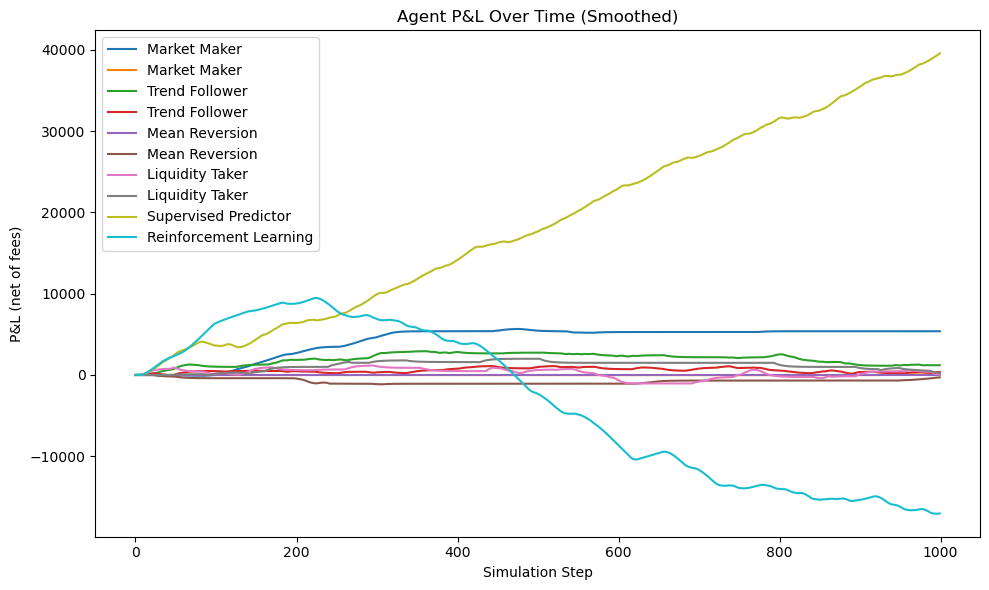

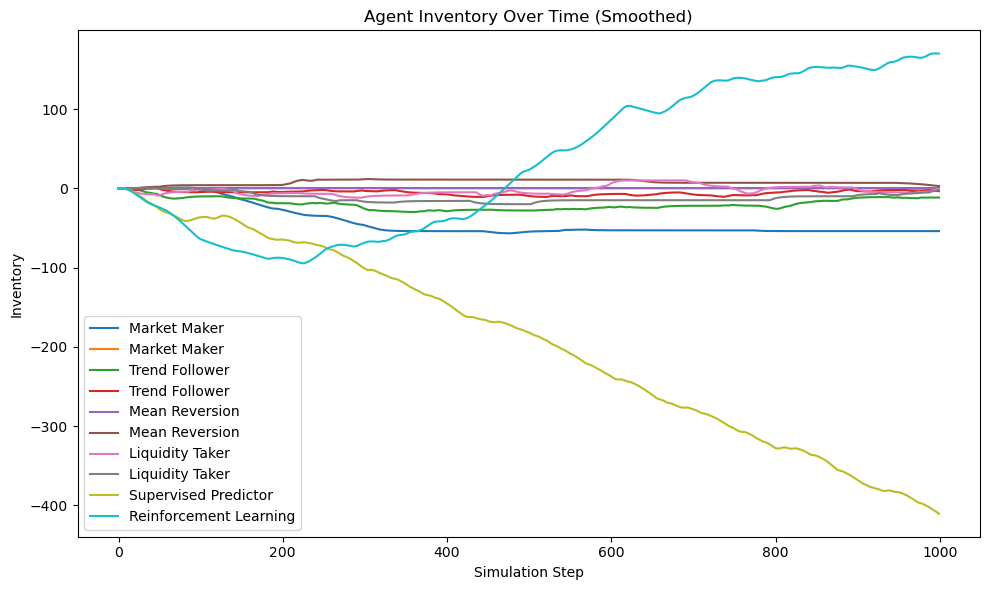

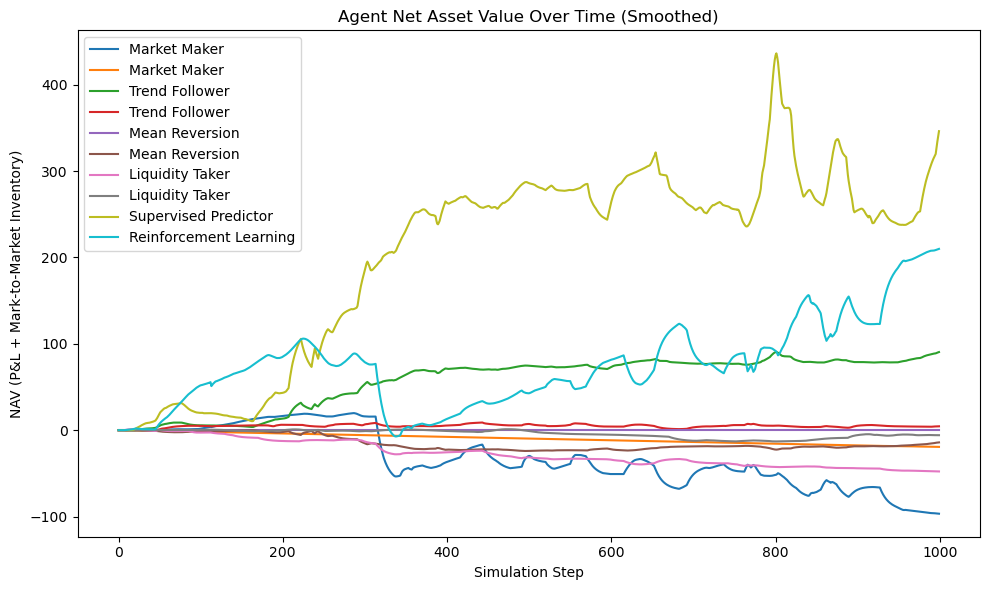

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import collections


def plot_metrics(csv_path="metrics.csv", span=20):
    # 1) Load the CSV
    df = pd.read_csv(csv_path)
    steps = df["step"]

    # 1a) Compute a smoothed version of each series
    agentNameMap = collections.defaultdict()
    agentNameMap['MM'] = 'Market Maker'
    agentNameMap['MR'] = 'Mean Reversion'
    agentNameMap['TF'] = 'Trend Follower'
    agentNameMap['LT'] = 'Liquidity Taker'
    agentNameMap['SP'] = 'Supervised Predictor'
    agentNameMap['RL'] = 'Reinforcement Learning'
    
    
    smooth = df.copy()
    for col in df.columns:
        if col != "step":
            # exponential weighted moving average
            smooth[col] = df[col].ewm(span=span, adjust=False).mean()

    # 2) Plot P&L over time
    plt.figure(figsize=(10, 6))
    for col in smooth.columns:
        if col.endswith("_pnl"):
            agent = col[:-6]
            agent2 = agentNameMap[agent]
            plt.plot(steps, smooth[col], label=f"{agent2}")
    plt.xlabel("Simulation Step")
    plt.ylabel("P&L (net of fees)")
    plt.title("Agent P&L Over Time (Smoothed)")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.savefig("pnl_over_time_smoothed.png")
    print("Saved smoothed P&L chart to pnl_over_time_smoothed.png")

    # 3) Plot Inventory over time
    plt.figure(figsize=(10, 6))
    for col in smooth.columns:
        if col.endswith("_inv"):
            agent = col[:-6]
            print(agent)
            agent2 = agentNameMap[agent]
            plt.plot(steps, smooth[col], label=f"{agent2}")
    plt.xlabel("Simulation Step")
    plt.ylabel("Inventory")
    plt.title("Agent Inventory Over Time (Smoothed)")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.savefig("inventory_over_time_smoothed.png")
    print("Saved smoothed inventory chart to inventory_over_time_smoothed.png")

    # 4) Plot NAV (mark-to-market) over time
    plt.figure(figsize=(10, 6))
    for col in smooth.columns:
        if col.endswith("_nav"):
            agent = col[:-6]
            agent2 = agentNameMap[agent]
            plt.plot(steps, smooth[col], label=f"{agent2}")
    plt.xlabel("Simulation Step")
    plt.ylabel("NAV (P&L + Mark-to-Market Inventory)")
    plt.title("Agent Net Asset Value Over Time (Smoothed)")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.savefig("nav_over_time_smoothed.png")
    print("Saved smoothed NAV chart to nav_over_time_smoothed.png")

if __name__ == "__main__":
    # You can tweak span to control smoothing: e.g. span=10, 20, 50, ...
    plot_metrics(span=20)

